In [1]:
import quandl

In [5]:
aapl = quandl.get("WIKI/AAPL", start_date = "2010-01-01", end_date = "2017-12-31")

In [7]:
aapl.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-01-04,213.43,214.50,212.38,214.01,17633200.0,0.0,1.0,27.428730,27.566240,27.293790,27.503268,123432400.0
2010-01-05,214.60,215.59,213.25,214.38,21496600.0,0.0,1.0,27.579091,27.706320,27.405597,27.550818,150476200.0
2010-01-06,214.38,215.23,210.75,210.97,19720000.0,0.0,1.0,27.550818,27.660055,27.084312,27.112585,138040000.0
2010-01-07,211.75,212.00,209.05,210.58,17040400.0,0.0,1.0,27.212826,27.244955,26.865839,27.062465,119282800.0
2010-01-08,210.30,212.00,209.06,211.98,15986100.0,0.0,1.0,27.026481,27.244955,26.867124,27.242385,111902700.0


In [8]:
aapl.tail(10)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-12-15,173.63,174.170,172.460,173.87,37054632.0,0.0,1.0,173.63,174.170,172.460,173.87,37054632.0
2017-12-18,174.88,177.200,174.860,176.42,28831533.0,0.0,1.0,174.88,177.200,174.860,176.42,28831533.0
2017-12-19,175.03,175.390,174.090,174.54,27078872.0,0.0,1.0,175.03,175.390,174.090,174.54,27078872.0
2017-12-20,174.87,175.420,173.250,174.35,23000392.0,0.0,1.0,174.87,175.420,173.250,174.35,23000392.0
2017-12-21,174.17,176.020,174.100,175.01,20356826.0,0.0,1.0,174.17,176.020,174.100,175.01,20356826.0
2017-12-22,174.68,175.424,174.500,175.01,16052615.0,0.0,1.0,174.68,175.424,174.500,175.01,16052615.0
2017-12-26,170.80,171.470,169.679,170.57,32968167.0,0.0,1.0,170.80,171.470,169.679,170.57,32968167.0
2017-12-27,170.10,170.780,169.710,170.60,21672062.0,0.0,1.0,170.10,170.780,169.710,170.60,21672062.0
2017-12-28,171.00,171.850,170.480,171.08,15997739.0,0.0,1.0,171.00,171.850,170.480,171.08,15997739.0


In [95]:
import pandas as pd
from pandas import DataFrame
aapl = pd.DataFrame(aapl)
print(aapl.columns)
print(aapl.index)
mydata = aapl[['Adj. Close']].copy()

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')
DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=2011, freq=None)


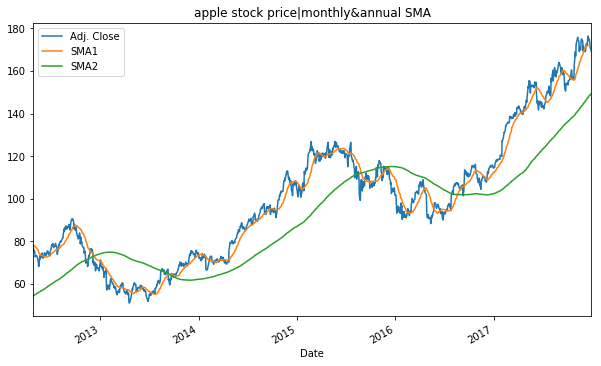

In [137]:
# calculation and visualization of 2 SMAs with rolling method
mydata['SMA1'] = mydata['Adj. Close'].rolling(14).mean() # monthly moving average
mydata['SMA2'] = mydata['Adj. Close'].rolling(252).mean() # yearly moving average
mydata.tail(20)
mydata.dropna(inplace = True) # delete NA
import matplotlib.pyplot as plt
mydata[['Adj. Close','SMA1','SMA2']].plot(title = 'apple stock price|monthly&annual SMA', figsize =(10,6))

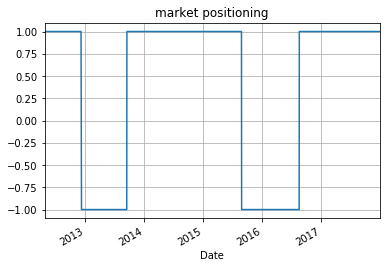

In [138]:
#market positioning - Generating signals by trading rule and getting to know more about stock & strategy
import numpy as np
mydata['position'] = np.where(mydata['SMA1']>mydata['SMA2'], 1, -1)
mydata['position'].plot(ylim =[-1.1,1.1], title ='market positioning')
mydata['return'] = np.log(mydata['Adj. Close']/mydata['Adj. Close'].shift(1)) 
mydata['return'].hist(bins = 50)
mydata['strategy'] = mydata['position'].shift(1)*mydata['return'] #注意避免使用未来函数

return      0.245482
strategy    0.245344
dtype: float64

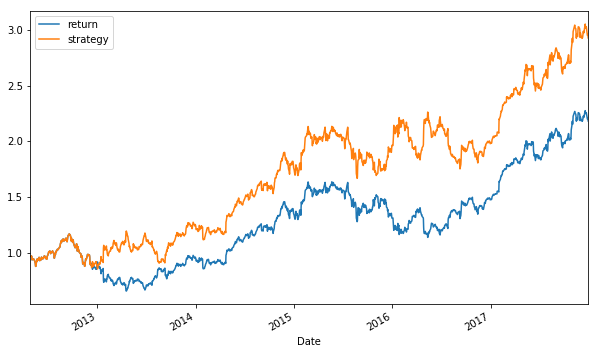

In [140]:
mydata[['return','strategy']].sum() # returns at the end of the strategy
mydata[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6)) #cumulative return
mydata[['return','strategy']].mean()*252 #annualized return
mydata[['return','strategy']].std()*252**0.5

max_drawdown 0.5096421677632832


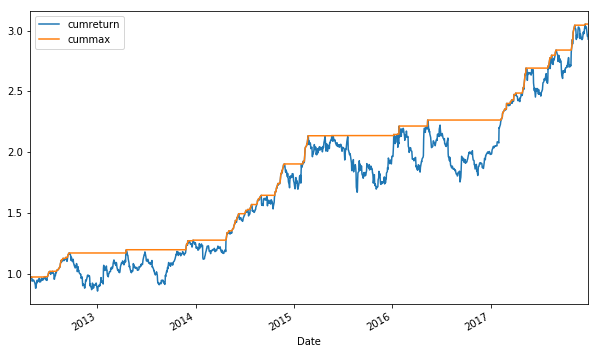

In [141]:
# evaluate strategy's performance: drawdown and timedelta
mydata['cumreturn'] = mydata['strategy'].cumsum().apply(np.exp)
#mydata['return.dis0'] = mydata['Adj. Close']/mydata['Adj. Close'].shift(1) -1
#mydata['return.dis'] = mydata['Adj. Close'].pct_change()
mydata['cummax'] = mydata['cumreturn'].cummax()
mydata[['cumreturn','cummax']].plot(figsize = (10,6))


In [148]:
drawdown = mydata['cummax'] - mydata['cumreturn']
max_drawdown = drawdown.max()
temp = drawdown[drawdown == 0]
periods = (temp.index[1:].to_datetime() - temp.index[:-1].to_datetime())

TimedeltaIndex(['1 days', '2 days', '1 days'], dtype='timedelta64[ns]', name='Date', freq=None)

In [149]:
temp.index[1:]

DatetimeIndex(['2012-05-02', '2012-06-19', '2012-07-02', '2012-07-03',
               '2012-07-05', '2012-07-09', '2012-07-19', '2012-08-03',
               '2012-08-06', '2012-08-09',
               ...
               '2017-08-30', '2017-08-31', '2017-09-01', '2017-10-30',
               '2017-10-31', '2017-11-03', '2017-11-06', '2017-11-07',
               '2017-11-09', '2017-12-18'],
              dtype='datetime64[ns]', name='Date', length=130, freq=None)

In [150]:
temp.index[:-1]

DatetimeIndex(['2012-04-30', '2012-05-02', '2012-06-19', '2012-07-02',
               '2012-07-03', '2012-07-05', '2012-07-09', '2012-07-19',
               '2012-08-03', '2012-08-06',
               ...
               '2017-08-29', '2017-08-30', '2017-08-31', '2017-09-01',
               '2017-10-30', '2017-10-31', '2017-11-03', '2017-11-06',
               '2017-11-07', '2017-11-09'],
              dtype='datetime64[ns]', name='Date', length=130, freq=None)

In [151]:
periods

TimedeltaIndex([ '2 days', '48 days', '13 days',  '1 days',  '2 days',
                 '4 days', '10 days', '15 days',  '3 days',  '3 days',
                ...
                 '1 days',  '1 days',  '1 days', '59 days',  '1 days',
                 '3 days',  '3 days',  '1 days',  '2 days', '39 days'],
               dtype='timedelta64[ns]', name='Date', length=130, freq=None)

In [152]:
# strategy optimizaiton
mydata['28-252'] = mydata['SMA1'] - mydata['SMA2']
mydata['28-252'].head(10)

Date
2012-04-27    23.608318
2012-04-30    23.388177
2012-05-01    23.174405
2012-05-02    22.991824
2012-05-03    22.808069
2012-05-04    22.505108
2012-05-07    22.184935
2012-05-08    21.845525
2012-05-09    21.546756
2012-05-10    21.299642
Name: 28-252, dtype: float64

In [154]:
Distance = 0.25
mydata['regime'] = np.where(mydata['28-252']> Distance, 1,0)
mydata['regime'] = np.where(mydata['28-252']< -Distance,-1, mydata['regime'])
mydata['regime'].value_counts()

 1    984
-1    435
 0      8
Name: regime, dtype: int64

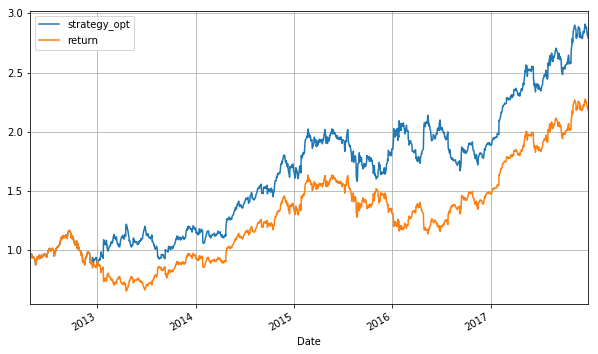

In [157]:
mydata['strategy_opt'] = mydata['regime'].shift(1)*mydata['return']
mydata[['strategy_opt','return']].cumsum().apply(np.exp).plot(grid = True, figsize =(10,6))